In [11]:
import pandas as pd
from pptx import Presentation
from pptx.util import Inches
import matplotlib.pyplot as plt
import os

# Function to read CSV file and process data
def process_data(file_path):
    df = pd.read_csv(file_path)
    df['Market Cap($)'] = pd.to_numeric(df['Market Cap($)'], errors='coerce')
    df = df.dropna(subset=['Market Cap($)'])
    top_50_df = df.nlargest(50, 'Market Cap($)')
    return top_50_df

# Function to create a Revenue Growth chart for a specific ticker
def create_revenue_growth_chart(ticker, historical_data, output_file):
    # Filter the historical data for the specific ticker
    ticker_data = historical_data[historical_data['Ticker'] == ticker]
    
    if ticker_data.empty:
        print(f"No data available for ticker {ticker}.")
        return
    
    # Plot revenue growth over time
    plt.figure(figsize=(10, 6))
    plt.bar(ticker_data['Date'], ticker_data['Revenue'], color='blue', edgecolor='k')
    plt.title(f'{ticker} - Revenue Growth Over Time')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()  # Close the figure to avoid memory issues

# Function to create a PowerPoint slide with a chart
def create_presentation(top_50_df, historical_data_df):
    prs = Presentation()
    
    for index, row in top_50_df.iterrows():
        ticker = row['Ticker']
        
        # Generate the chart
        chart_image = f'{ticker}_revenue_growth.png'
        create_revenue_growth_chart(ticker, historical_data_df, chart_image)
        
        if not os.path.exists(chart_image):
            print(f"Chart image for {ticker} not created.")
            continue
        
        # Add a slide
        slide_layout = prs.slide_layouts[5]  # Title and Content layout
        slide = prs.slides.add_slide(slide_layout)
        
        # Add title with ticker and market cap
        title = slide.shapes.title
        title.text = f"{ticker} - Market Cap: ${row['Market Cap($)']:.0f}"
        
        # Add the chart image to the slide
        left = Inches(1)
        top = Inches(1.5)
        pic = slide.shapes.add_picture(chart_image, left, top, width=Inches(8.5))
        
        # Optionally, remove the chart image file after adding it to the slide
        os.remove(chart_image)
    
    # Save the presentation
    prs.save('Company_Revenue_Growth_Presentation.pptx')

# Main execution
if __name__ == "__main__":
    file_path = 'AllDatav2.csv'
    top_50_df = process_data(file_path)
    
    # Load historical data
    historical_data_df = pd.read_csv('historical_data_final2.csv')
    
    create_presentation(top_50_df, historical_data_df)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/charanrameshkumar/badatasciproject/all code/Enterprise Value/Revenue_chart.png'

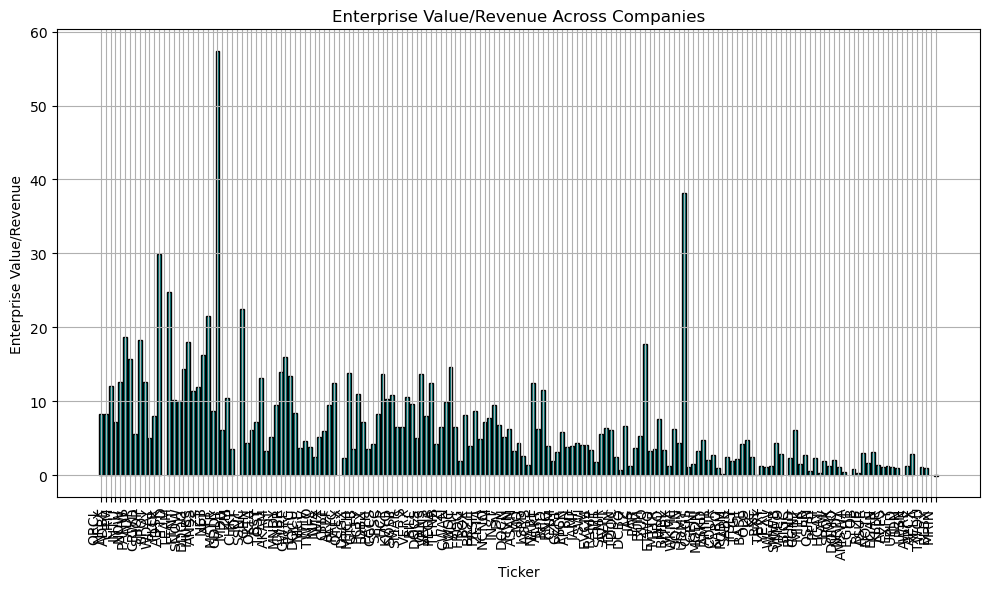

In [15]:
import pandas as pd
from pptx import Presentation
from pptx.util import Inches
import matplotlib.pyplot as plt
import os

# Function to read CSV file and process data
def process_data(file_path):
    df = pd.read_csv(file_path)
    df['Market Cap($)'] = pd.to_numeric(df['Market Cap($)'], errors='coerce')
    df = df.dropna(subset=['Market Cap($)'])
    top_50_df = df.nlargest(50, 'Market Cap($)')
    return top_50_df

# Function to find the top 10 tickers for each metric
def find_top_10_metrics(valuation_metrics_df):
    top_10_dict = {}
    
    metrics = ['Enterprise Value/Revenue', 'EBITDA Multiple', 'Debt to Equity Ratio', 'Return on Equity']
    
    for metric in metrics:
        top_10_dict[metric] = valuation_metrics_df[['Ticker', metric]].sort_values(by=metric, ascending=False).head(10)['Ticker'].tolist()
    
    return top_10_dict

# Function to create a Revenue Growth chart for a specific ticker
def create_revenue_growth_chart(ticker, historical_data, output_file):
    # Filter the historical data for the specific ticker
    ticker_data = historical_data[historical_data['Ticker'] == ticker]
    
    if ticker_data.empty:
        print(f"No data available for ticker {ticker}.")
        return
    
    # Plot revenue growth over time
    plt.figure(figsize=(10, 6))
    plt.bar(ticker_data['Date'], ticker_data['Revenue'], color='blue', edgecolor='k')
    plt.title(f'{ticker} - Revenue Growth Over Time')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(output_file)
    plt.close()  # Close the figure to avoid memory issues

# Function to create visualizations for valuation metrics
def create_valuation_metric_charts(valuation_metrics_df):
    metrics = ['Enterprise Value/Revenue', 'EBITDA Multiple', 'Debt to Equity Ratio', 'Return on Equity']
    
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        plt.bar(valuation_metrics_df['Ticker'], valuation_metrics_df[metric], color='teal', edgecolor='k')
        plt.title(f'{metric} Across Companies')
        plt.xlabel('Ticker')
        plt.ylabel(metric)
        plt.xticks(rotation=90, ha='right')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'{metric}_chart.png')
        plt.close()

# Function to create a PowerPoint slide with a chart
def create_presentation(top_50_df, historical_data_df, top_10_dict):
    prs = Presentation()
    
    for index, row in top_50_df.iterrows():
        ticker = row['Ticker']
        product_desc = row['Product Description']
        
        # Generate the chart
        chart_image = f'{ticker}_revenue_growth.png'
        create_revenue_growth_chart(ticker, historical_data_df, chart_image)
        
        if not os.path.exists(chart_image):
            print(f"Chart image for {ticker} not created.")
            continue
        
        # Add a slide
        slide_layout = prs.slide_layouts[5]  # Title and Content layout
        slide = prs.slides.add_slide(slide_layout)
        
        # Add title with ticker and market cap
        title = slide.shapes.title
        title.text = f"{ticker} - Market Cap: ${row['Market Cap($)']:.0f}"
        
        # Add product description to the slide
        textbox = slide.shapes.add_textbox(Inches(1), Inches(1), Inches(8.5), Inches(1))
        text_frame = textbox.text_frame
        p = text_frame.add_paragraph()
        p.text = f"Product Description: {product_desc}"
        
        # Add the chart image to the slide
        left = Inches(1)
        top = Inches(2.5)
        pic = slide.shapes.add_picture(chart_image, left, top, width=Inches(8.5))
        
        # Optionally, remove the chart image file after adding it to the slide
        os.remove(chart_image)
    
    # Add charts for valuation metrics
    for metric in ['Enterprise Value/Revenue', 'EBITDA Multiple', 'Debt to Equity Ratio', 'Return on Equity']:
        slide_layout = prs.slide_layouts[5]  # Title and Content layout
        slide = prs.slides.add_slide(slide_layout)
        
        title = slide.shapes.title
        title.text = f"{metric} Overview"
        
        chart_image = f'{metric}_chart.png'
        if os.path.exists(chart_image):
            left = Inches(1)
            top = Inches(1.5)
            pic = slide.shapes.add_picture(chart_image, left, top, width=Inches(8.5))
    
    # Add a summary slide with the top 10 companies for each metric
    slide_layout = prs.slide_layouts[5]  # Title and Content layout
    slide = prs.slides.add_slide(slide_layout)
    title = slide.shapes.title
    title.text = "Top 10 Companies by Valuation Metrics"
    
    textbox = slide.shapes.add_textbox(Inches(1), Inches(1), Inches(8.5), Inches(5))
    text_frame = textbox.text_frame
    
    for metric, tickers in top_10_dict.items():
        p = text_frame.add_paragraph()
        p.text = f"Top 10 {metric}: {', '.join(tickers)}"
    
    # Save the presentation
    prs.save('Company_Revenue_Growth_Presentation2.pptx')

# Main execution
if __name__ == "__main__":
    # Load data
    file_path = 'AllDatav2.csv'
    top_50_df = process_data(file_path)
    
    valuation_metrics_file = 'valuation_metrics_official.csv'
    valuation_metrics_df = pd.read_csv(valuation_metrics_file)
    
    # Load historical data
    historical_data_df = pd.read_csv('historical_data_final2.csv')
    
    # Find top 10 companies for each metric
    top_10_dict = find_top_10_metrics(valuation_metrics_df)
    
    # Create valuation metric charts
    create_valuation_metric_charts(valuation_metrics_df)
    
    # Create the presentation with enhanced features
    create_presentation(top_50_df, historical_data_df, top_10_dict)


In [13]:
import pandas as pd

# Load the valuation metrics CSV file
valuation_metrics = pd.read_csv('valuation_metrics_official.csv')

# Function to get top and bottom companies based on a specific metric
def analyze_metric(metric, ascending=True, top_n=10):
    # Sort the DataFrame based on the metric
    sorted_df = valuation_metrics[['Ticker', metric]].sort_values(by=metric, ascending=ascending)
    # Filter out non-positive values if needed (for specific metrics like EV/Rev)
    if ascending:
        sorted_df = sorted_df.query(f'`{metric}` > 0')
    return sorted_df.head(top_n)

# List of important valuation metrics
metrics = ['Enterprise Value/Revenue', 'EBITDA Multiple', 'Debt to Equity Ratio', 'Return on Equity']

# Analyze and print top/bottom companies for each metric
for metric in metrics:
    print(f"\nTop 10 Companies by {metric}:")
    top_companies = analyze_metric(metric, ascending=False, top_n=10)
    print(top_companies)




Top 10 Companies by Enterprise Value/Revenue:
    Ticker  Enterprise Value/Revenue
24    MSTR                 57.433671
120   SOUN                 38.210656
12    PLTR                 29.934330
14     TTD                 24.743828
29     IOT                 22.425436
22     NET                 21.517014
5      NOW                 18.654943
8     CRWD                 18.341502
18    DDOG                 18.054953
112    RUM                 17.717803

Top 10 Companies by EBITDA Multiple:
    Ticker  EBITDA Multiple
104   SEMR      4674.620318
144   CGNT       831.629096
37    MNDY       824.345715
80    NCNO       489.928611
146     EB       379.685934
18    DDOG       346.186758
48    APPF       258.911748
12    PLTR       243.156612
123   GENI       240.160867
8     CRWD       190.736277

Top 10 Companies by Debt to Equity Ratio:
    Ticker  Debt to Equity Ratio
25    GDDY            120.622186
76     BOX             19.335933
142   BIGC             16.391533
166   LPSN             16

In [18]:
import pandas as pd

# Function to process and retrieve top 50 companies by market cap
def get_top_50_with_metrics(all_data_file, valuation_metrics_file):
    # Load the data
    all_data_df = pd.read_csv(all_data_file)
    valuation_metrics_df = pd.read_csv(valuation_metrics_file)
    
    # Convert Market Cap to numeric and drop rows with missing Market Cap
    all_data_df['Market Cap($)'] = pd.to_numeric(all_data_df['Market Cap($)'], errors='coerce')
    all_data_df = all_data_df.dropna(subset=['Market Cap($)'])
    
    # Get top 50 companies by Market Cap
    top_50_df = all_data_df.nlargest(50, 'Market Cap($)')
    
    # Merge with valuation metrics to get relevant columns
    top_50_with_metrics = pd.merge(top_50_df, valuation_metrics_df, on='Ticker', how='left')
    
    # Select relevant columns
    relevant_columns = ['Ticker', 'Company', 'Market Cap($)', 'Product Description', 
                        'Enterprise Value/Revenue', 'EBITDA Multiple', 'Debt to Equity Ratio', 'Return on Equity']
    
    top_50_with_metrics = top_50_with_metrics[relevant_columns]
    
    # Print the results
    for index, row in top_50_with_metrics.iterrows():
        print(f"Ticker: {row['Ticker']}")
        print(f"Company Name: {row['Company']}")
        print(f"Market Cap: ${row['Market Cap($)']:.2f}")
        print(f"Product Description: {row['Product Description']}")
        print(f"Enterprise Value/Revenue: {row['Enterprise Value/Revenue']}")
        print(f"EBITDA Multiple: {row['EBITDA Multiple']}")
        print(f"Debt to Equity Ratio: {row['Debt to Equity Ratio']}")
        print(f"Return on Equity: {row['Return on Equity']}")
        print("-" * 50)
    
    return top_50_with_metrics

# Main execution
if __name__ == "__main__":
    all_data_file = 'AllDatav2.csv'
    valuation_metrics_file = 'valuation_metrics_official.csv'
    
    top_50_companies = get_top_50_with_metrics(all_data_file, valuation_metrics_file)


Ticker: ORCL
Company Name: Oracle
Market Cap: $387694364615.00
Product Description: Wide range of enterprise software platforms, including database management systems, cloud services, and business applications.
Enterprise Value/Revenue: 8.314681998904854
EBITDA Multiple: 20.583054751051694
Debt to Equity Ratio: 15.135225183823527
Return on Equity: 1.2025505514705883
--------------------------------------------------
Ticker: NFLX
Company Name: Netflix
Market Cap: $295486184679.00
Product Description: Subscription-based streaming service for TV shows, movies, documentaries, etc.
Enterprise Value/Revenue: 8.287778151228808
EBITDA Multiple: 12.994521814397332
Debt to Equity Ratio: 1.3669735349370296
Return on Equity: 0.262672808597771
--------------------------------------------------
Ticker: ADBE
Company Name: Adobe
Market Cap: $250973276660.00
Product Description: Applications for graphic design, video editing, web development, and document management.
Enterprise Value/Revenue: 12.094101